<a href="https://colab.research.google.com/github/Phattharyu/CPE_232-Final_project-GoldPrediction-/blob/main/Gold_Proj_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library & Data from Google Drive using gdown**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader as pdr

from datetime import datetime

!gdown 14iSHWNraKglyrcLFQe5-GprkjkO6xaCK

df = pd.read_csv('Merged_Gold_dataset.csv')
df

Downloading...
From: https://drive.google.com/uc?id=14iSHWNraKglyrcLFQe5-GprkjkO6xaCK
To: /content/Merged_Gold_dataset.csv
100% 1.02M/1.02M [00:00<00:00, 116MB/s]


,Unnamed: 0,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
1,1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
2,2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
3,3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
4,4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2025-02-21,2937.600098,2940.000000,2917.300049,2938.800049,570,68.447600,2914.120020,2862.110022,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5004,5004,2025-02-24,2947.899902,2957.899902,2933.100098,2933.100098,415,69.639013,2922.180005,2870.640015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5005,5005,2025-02-25,2904.500000,2943.199951,2890.000000,2938.699951,1854,59.452120,2921.200000,2878.990015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5006,5006,2025-02-26,2916.800049,2917.000000,2913.000000,2913.500000,2050,61.185088,2921.630005,2886.490015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912


In [3]:
df

,Unnamed: 0,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
1,1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
2,2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
3,3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
4,4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2025-02-21,2937.600098,2940.000000,2917.300049,2938.800049,570,68.447600,2914.120020,2862.110022,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5004,5004,2025-02-24,2947.899902,2957.899902,2933.100098,2933.100098,415,69.639013,2922.180005,2870.640015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5005,5005,2025-02-25,2904.500000,2943.199951,2890.000000,2938.699951,1854,59.452120,2921.200000,2878.990015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5006,5006,2025-02-26,2916.800049,2917.000000,2913.000000,2913.500000,2050,61.185088,2921.630005,2886.490015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2025-02-21,2937.600098,2940.000000,2917.300049,2938.800049,570,68.447600,2914.120020,2862.110022,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5004,2025-02-24,2947.899902,2957.899902,2933.100098,2933.100098,415,69.639013,2922.180005,2870.640015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5005,2025-02-25,2904.500000,2943.199951,2890.000000,2938.699951,1854,59.452120,2921.200000,2878.990015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5006,2025-02-26,2916.800049,2917.000000,2913.000000,2913.500000,2050,61.185088,2921.630005,2886.490015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912


In [5]:
df.corr(numeric_only=True)

,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
Close,1.000000,0.999804,0.999848,0.999647,0.011110,0.056102,0.998708,0.997313,0.872774,-0.752249,0.833702,0.740655,0.841121,-0.059680,-0.149081,-0.251865
High,0.999804,1.000000,0.999690,0.999834,0.010136,0.052526,0.998855,0.997459,0.871735,-0.751766,0.832376,0.741015,0.840397,-0.057307,-0.151421,-0.253908
Low,0.999848,0.999690,1.000000,0.999767,0.012452,0.052978,0.998783,0.997415,0.874127,-0.753077,0.835329,0.740459,0.842230,-0.062724,-0.146818,-0.249747
Open,0.999647,0.999834,0.999767,1.000000,0.011446,0.049126,0.998966,0.997592,0.872586,-0.752268,0.833431,0.740425,0.841154,-0.059515,-0.149046,-0.251921
Volume,0.011110,0.010136,0.012452,0.011446,1.000000,-0.012192,0.011804,0.011963,0.003536,-0.016081,0.002869,0.019215,0.001425,0.007951,-0.006660,-0.009115
RSI,0.056102,0.052526,0.052978,0.049126,-0.012192,1.000000,0.018972,-0.007342,-0.014676,0.121702,-0.006387,0.028437,-0.056291,0.042505,-0.051882,-0.003192
SMA10,0.998708,0.998855,0.998783,0.998966,0.011804,0.018972,1.000000,0.999273,0.873151,-0.755273,0.833788,0.740134,0.842896,-0.060396,-0.146759,-0.251503
SMA20,0.997313,0.997459,0.997415,0.997592,0.011963,-0.007342,0.999273,1.000000,0.873465,-0.758442,0.833877,0.739234,0.844762,-0.061777,-0.143694,-0.250819
CPIAUCSL,0.872774,0.871735,0.874127,0.872586,0.003536,-0.014676,0.873151,0.873465,1.000000,-0.761020,0.992917,0.764638,0.923692,-0.424960,-0.104947,-0.112536
CIVPART,-0.752249,-0.751766,-0.753077,-0.752268,-0.016081,0.121702,-0.755273,-0.758442,-0.761020,1.000000,-0.748032,-0.704932,-0.647723,0.151635,0.115453,0.367344


In [ ]:
#CPIAUCSL	CIVPART	GDP	GEPUCURRENT	PPIACO

# **MinMaxScaler**

# **Data Processing**

In [47]:
train_size = round(len(df)*0.75)
val_size = round(len(df)*0.9) - round(len(df)*0.75)
test_size = len(df) - train_size - val_size
print('Train:',train_size,'Valid:',val_size,'Test:',test_size)

Train: 3756 Valid: 751 Test: 501


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [52]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [53]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [54]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [55]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma10[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [56]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_sma10[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [57]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma10[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [62]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

In [63]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [64]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [67]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 20,callbacks=[cp])

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0286 - root_mean_squared_error: 0.1627 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0533
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4109e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3907e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0345
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6527e-04 - root_mean_squared_error: 0.0128 - val_loss: 7.4039e-04 - val_root_mean_squared_error: 0.0272
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2439e-04 - root_mean_squared_error: 0.0111 - val_loss: 4.5419e-04 - val_root_mean_squared_error: 0.0213
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6972e-05 - root_mean_squared_error: 0.0098 - val_loss: 3.0557e-04 - val_root_mean_squared_error: 0.0175
Epoch 7/20
118/118 ━

In [72]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4539e-04 - root_mean_squared_error: 0.0120  


In [73]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
CPU times: user 311 ms, sys: 8.66 ms, total: 319 ms
Wall time: 405 ms


In [74]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00017521476547699422
Test RMSE: 0.013236870989203453
Test MAPE: 0.014182675752730092
Test Accuracy: 0.9858173242472699


In [70]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


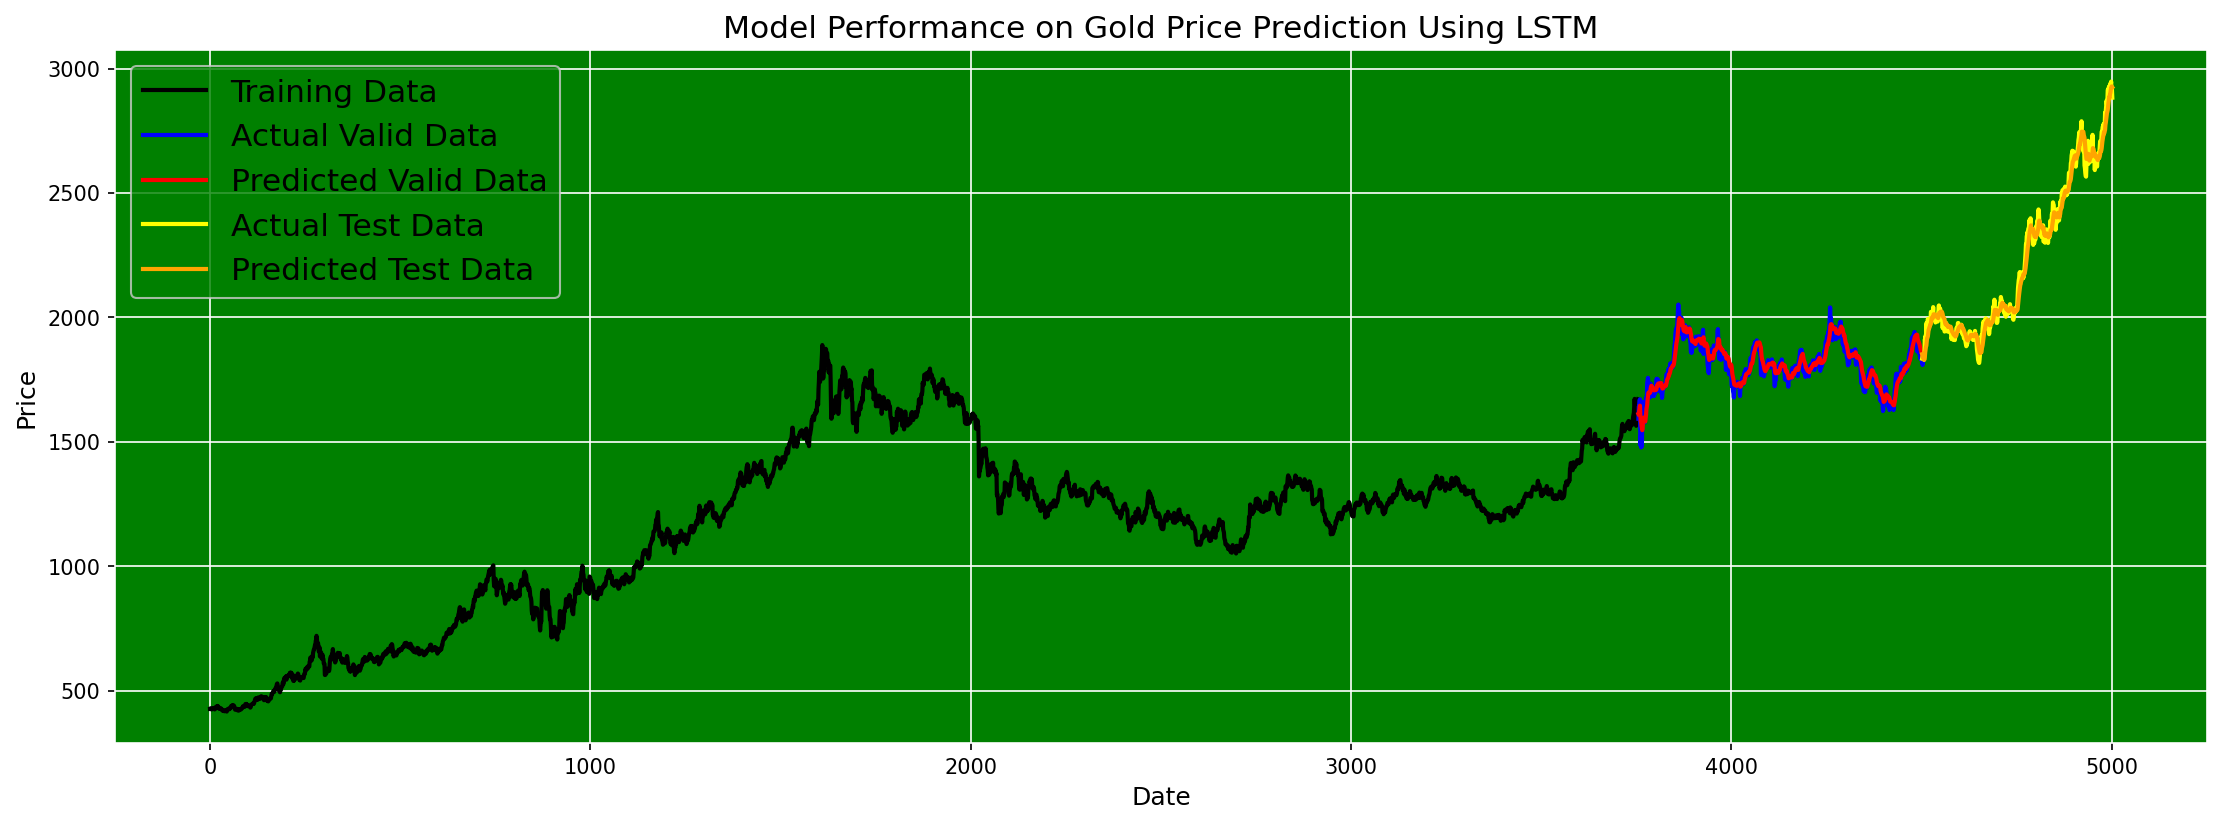

In [71]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using LSTM', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988434892914304